In [1]:
# Oskar Hibbert, 2023

In [2]:
# Import necessary libraries and modules
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
# Set the matplotlib style sheet to 'custom' (Oskar)
plt.style.use('custom')

In [4]:
# List all CSV files in the 'data' directory
csv_files = glob.glob(os.path.join("data", "*.csv"))

# Read each CSV file into a DataFrame and store them in a list
df_all = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames in the list into one DataFrame
df = pd.concat(df_all, ignore_index=True)

# Display the resulting DataFrame
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,tail_number,departure_delay,arrival_delay,delay_carrier,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,2019-07-01,215,N611AS,0,-16,0,...,0.0,29.60,10.0,6.0,7.027253e+10,57.0,0.0,30.04,10.0,3.0
1,B6,1092,BQN,FLL,2019-07-01,155,N589JB,-19,-40,0,...,NaN,29.81,10.0,9.0,7.478301e+10,78.0,0.0,30.01,10.0,0.0
2,B6,668,PSE,MCO,2019-07-01,175,N662JB,73,69,0,...,NaN,NaN,NaN,NaN,7.220501e+10,76.0,0.0,29.93,10.0,3.0
3,F9,402,LAX,DEN,2019-07-01,143,N706FR,-1,-7,0,...,0.0,29.60,10.0,6.0,7.256500e+10,62.0,0.0,24.69,10.0,8.0
4,F9,790,PDX,DEN,2019-07-01,156,N350FR,21,10,0,...,0.0,29.92,10.0,6.0,7.256500e+10,62.0,0.0,24.70,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512898,DL,3526,ATL,MGM,2019-05-31,59,N8923A,-1,-18,0,...,0.0,28.84,10.0,7.0,7.222601e+10,74.0,0.0,29.67,10.0,6.0
5512899,DL,508,ATL,BHM,2019-05-31,55,N978DL,-3,-6,0,...,0.0,28.84,10.0,7.0,7.222801e+10,74.0,0.0,29.26,10.0,0.0
5512900,DL,1075,ATL,HSV,2019-05-31,57,N952AT,31,18,18,...,0.0,28.84,10.0,8.0,7.232300e+10,71.0,0.0,29.20,10.0,3.0
5512901,DL,2436,ATL,BHM,2019-05-31,56,N916DL,28,13,0,...,0.0,28.84,10.0,8.0,7.222801e+10,67.0,0.0,29.24,10.0,0.0


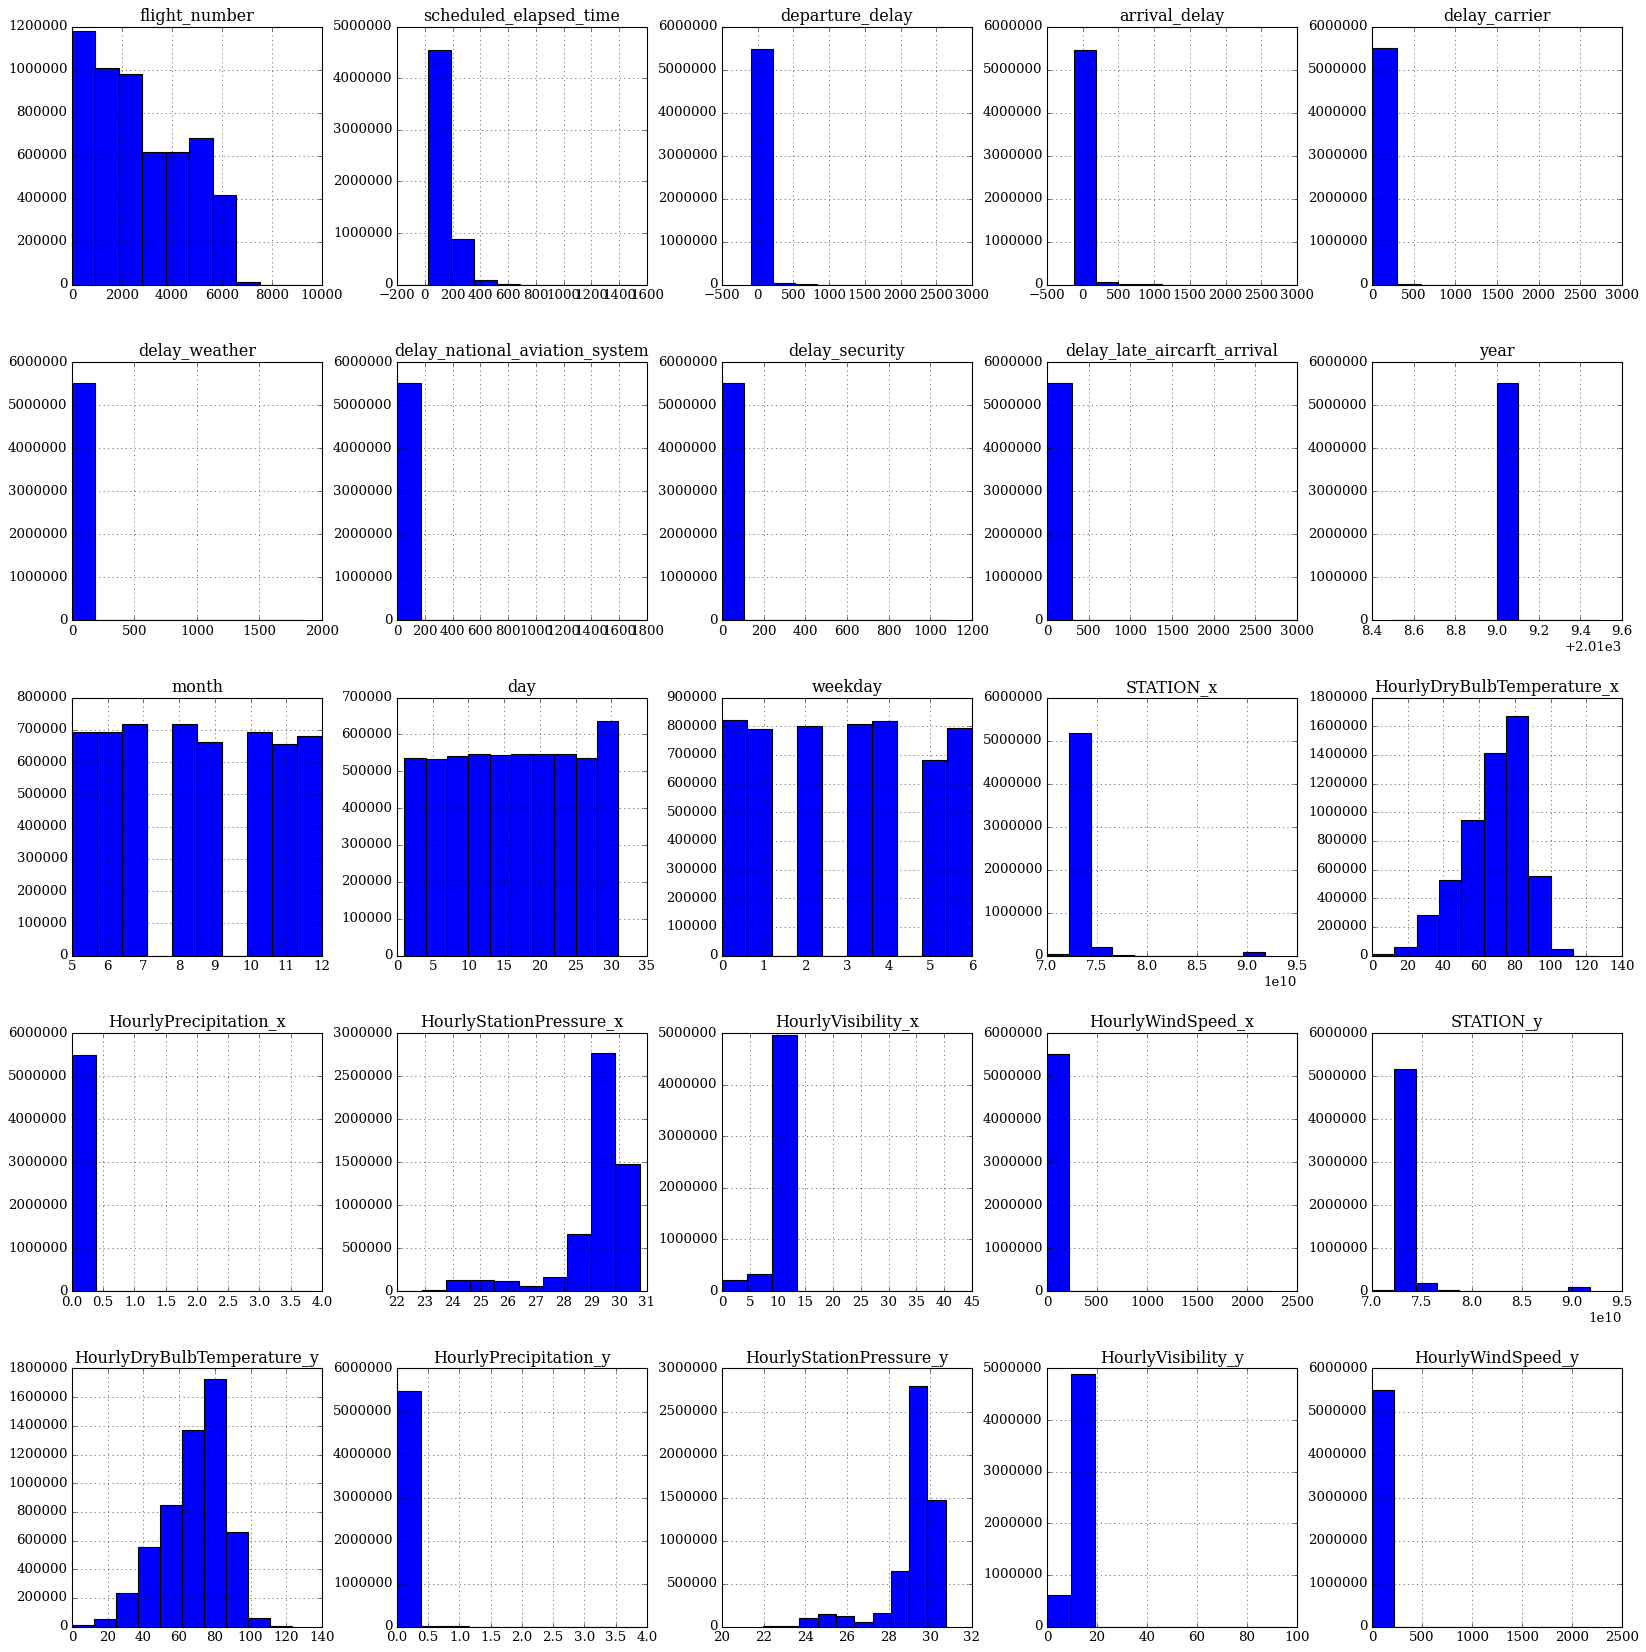

In [5]:
# Display a histogram of each numeric column in the DataFrame
df.hist(figsize=(25, 25));

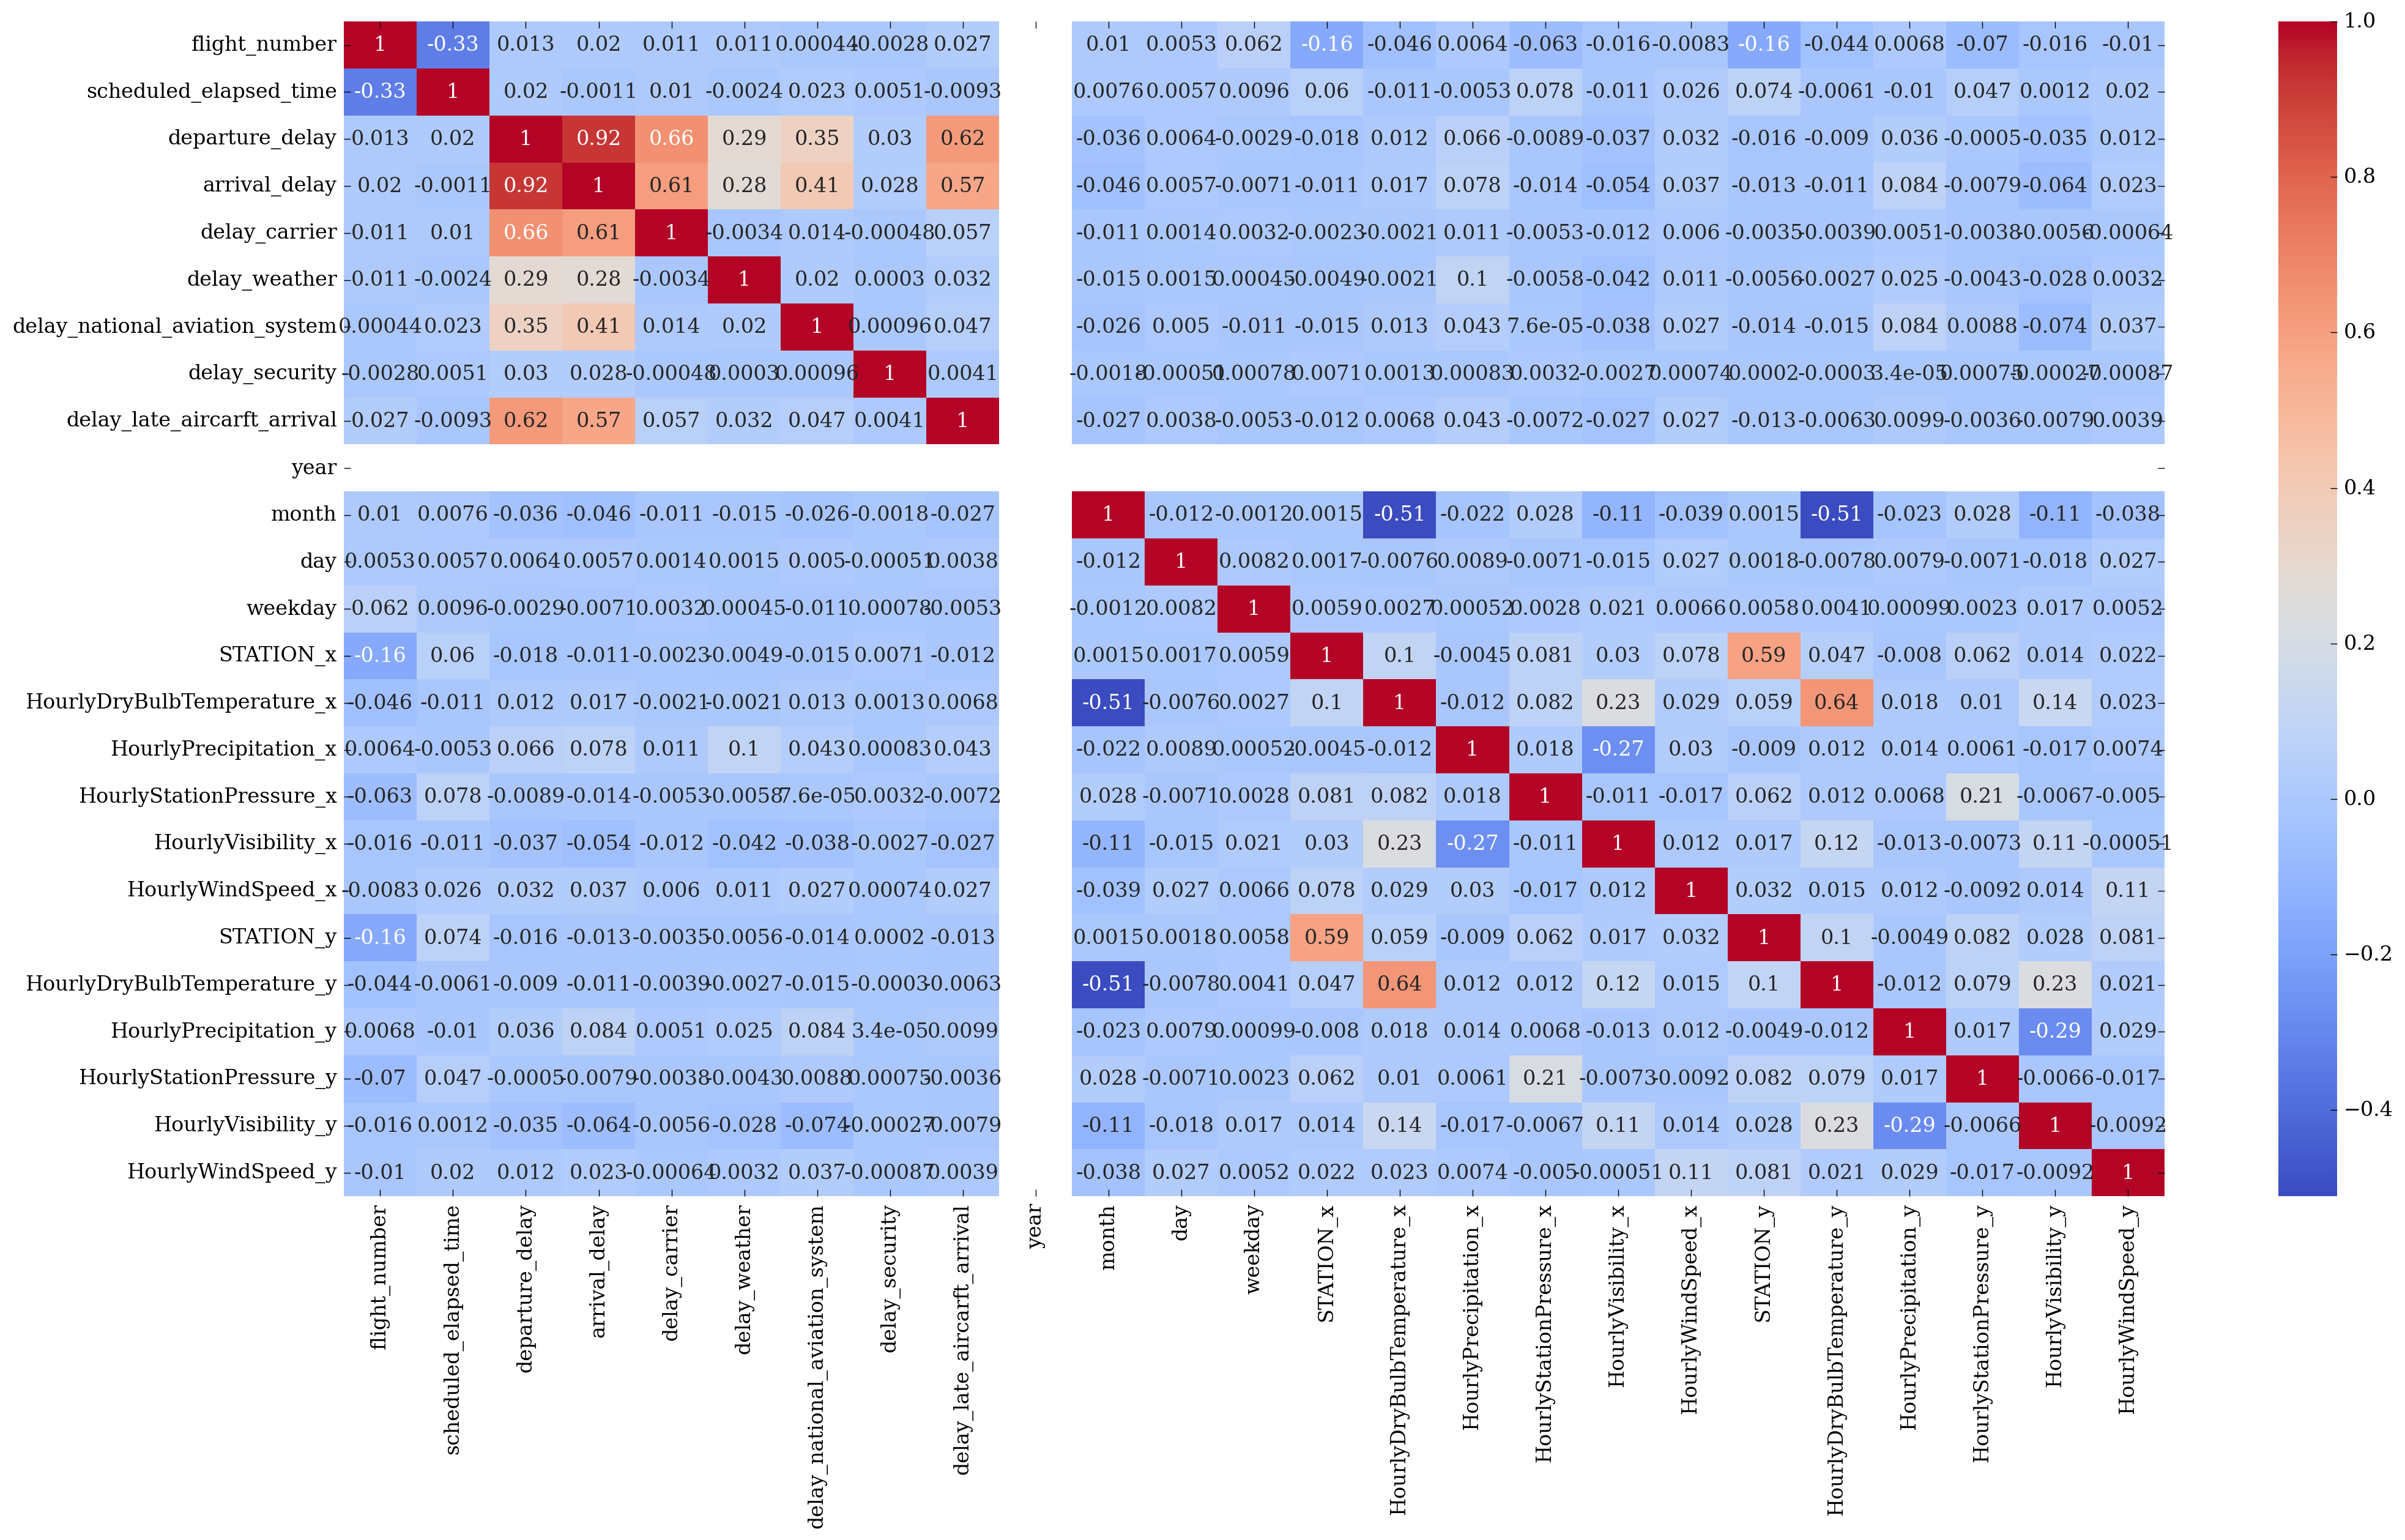

In [6]:
# Calculate and display the correlation matrix of each numeric column in the DataFrame
correlation_matrix = df[df.select_dtypes(include=[np.number]).columns].corr()
plt.figure(figsize=(24,12), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Display the data types, missing value counts, and missing value percentages
missing_values = df.isnull().sum()

pd.DataFrame({
    'data_type': df.dtypes,
    'missing_value_count': missing_values,
    'missing_value_pct': round((missing_values / len(df)) * 100, 2)
})

,data_type,missing_value_count,missing_value_pct
carrier_code,object,0,0.00
flight_number,int64,0,0.00
origin_airport,object,0,0.00
destination_airport,object,0,0.00
date,object,0,0.00
scheduled_elapsed_time,int64,0,0.00
tail_number,object,13556,0.25
departure_delay,int64,0,0.00
arrival_delay,int64,0,0.00
delay_carrier,int64,0,0.00


In [8]:
# Drop the 'tail_number' column
df = df.drop(columns='tail_number')

# Drop rows with missing values in columns other than 'actual_departure_dt' and 'actual_arrival_dt' (cancelled flights)
df = df.dropna(subset=df.columns.difference(['actual_departure_dt', 'actual_arrival_dt']))

In [9]:
# Convert the date columns to datetime format
date_columns = ['date', 'scheduled_departure_dt', 'scheduled_arrival_dt', 'actual_departure_dt', 'actual_arrival_dt']

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [10]:
# Create a list of unique weather station identification values
unique_values = pd.concat([df['STATION_x'], df['STATION_y']]).unique()

# Create a dictionary to map the unique values to integer indices
id_dict = {value: index + 1 for index, value in enumerate(unique_values)}

# Update the weather station identification values with their corresponding integer indices (for improved readability)
df['STATION_x'] = df['STATION_x'].replace(id_dict).astype(int)
df['STATION_y'] = df['STATION_y'].replace(id_dict).astype(int)

In [11]:
# Define a function to categorise departure and arrival delays into categories
def categorise_delay(delay):
    if delay <= 15:
        return 0  # None to minor delay (less than 15 minutes)
    elif 15 < delay <= 60:
        return 1  # Moderate delay (15 to 60 minutes)
    elif 60 < delay <= 120:
        return 2  # Significant delay (60 to 120 minutes)
    else:
        return 3  # Severe delay (greater than 120 minutes)

# Apply the 'categorise_delay' function to create new columns for categorised departure and arrival delays
df['departure_delay_categorised'] = df['departure_delay'].apply(categorise_delay)
df['arrival_delay_categorised'] = df['arrival_delay'].apply(categorise_delay)

In [12]:
# Extract historical measurements for each origin and destination weather station
df_stations_x = df[[col for col in df.columns if '_x' in col]]
df_stations_y = df[[col for col in df.columns if '_y' in col]]

df_stations_x.columns = [col.replace('_x', '') for col in df_stations_x.columns]
df_stations_y.columns = [col.replace('_y', '') for col in df_stations_y.columns]

# Concatenate the data from each origin and destination weather station into a single DataFrame
df_stations = pd.concat([df_stations_x, df_stations_y], ignore_index=True)

# Display the resulting DataFrame
df_stations

,STATION,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyStationPressure,HourlyVisibility,HourlyWindSpeed
0,1,65.0,0.0,29.60,10.0,6.0
1,2,65.0,0.0,29.60,10.0,6.0
2,3,66.0,0.0,29.92,10.0,6.0
3,4,58.0,0.0,30.03,10.0,13.0
4,5,71.0,0.0,29.24,10.0,7.0
...,...,...,...,...,...,...
10985681,290,74.0,0.0,29.67,10.0,6.0
10985682,238,74.0,0.0,29.26,10.0,0.0
10985683,281,71.0,0.0,29.20,10.0,3.0
10985684,238,67.0,0.0,29.24,10.0,0.0


In [13]:
# Define a function to calculate a specific percentile for a Series
def percentile(n):
    def percentile_(x):
        return x.quantile(n / 100.0)
    percentile_.__name__ = f'percentile_{n}'
    return percentile_

# Group the 'df_stations' DataFrame by weather station and calculate statistics for each weather station
df_stations_stats = df_stations.groupby('STATION').agg({
    'HourlyDryBulbTemperature': ['mean', 'std'],
    'HourlyPrecipitation': [percentile(75), percentile(99)],
    'HourlyStationPressure': ['mean', 'std'],
    'HourlyVisibility': ['mean', 'std'],
    'HourlyWindSpeed': ['mean', 'std']
})

# Define a function to calculate precipitation statistics with non-zero values only
def non_zero_precipitation_stats(series):
    non_zero_values = series[series > 0]
    
    if len(non_zero_values) > 0:
        return non_zero_values.agg([percentile(75), percentile(99)])
    else:
        return pd.Series({'percentile_75': 0, 'percentile_99': 0})

# Calculate precipitation statistics with non-zero values only for each weather station
df_stations_precip_stats = df_stations.groupby('STATION')['HourlyPrecipitation'].apply(non_zero_precipitation_stats).unstack()

# Update the precipitation statistics in the 'df_stations_stats' DataFrame
df_stations_stats['HourlyPrecipitation'] = df_stations_precip_stats

# Display the resulting DataFrame
df_stations_stats

HourlyDryBulbTemperature            HourlyPrecipitation                \
                            mean        std       percentile_75 percentile_99   
STATION                                                                         
1                      59.333182  11.062903              0.0400        0.1984   
2                      67.370012   6.760640              0.0600        0.4600   
3                      61.024470  12.811229              0.0400        0.2000   
4                      62.722105   7.772467              0.0500        0.2700   
5                      60.227268  18.209664              0.0700        0.5700   
...                          ...        ...                 ...           ...   
359                    61.771930  15.779405              0.0500        0.2900   
360                    80.410714   1.714085              0.0700        0.3200   
361                    46.664286   7.115300              0.0275        0.1235   
362                    48.080000  20.163814              0.0200        0.0382   
363                    55.837838  13.912121              0.0200        0.0300   

        HourlyStationPressure           HourlyVisibility            \
                         mean       std             mean       std   
STATION                                                              
1                   29.579181  0.161494         9.260902  2.085376   
2                   29.594916  0.092087         9.210403  1.709061   
3                   29.929731  0.161903         9.622989  1.541169   
4                   29.951209  0.113568         9.589244  1.304864   
5                   29.266099  0.181922         9.451145  1.699289   
...                       ...       ...              ...       ...   
359                 29.843531  0.199656         8.889539  2.555373   
360                 29.861429  0.067418         9.602679  1.651603   
361                 29.795857  0.326721         8.853571  2.457734   
362                 28.824300  0.158817         9.385000  1.736208   
363                 26.962823  0.178076         9.929429  0.595146   

        HourlyWindSpeed            
                   mean       std  
STATION                            
1              7.481475  3.715866  
2              8.234362  4.463691  
3              6.529072  4.422385  
4             11.570113  6.872231  
5              9.795081  4.680372  
...                 ...       ...  
359            7.703947  4.717289  
360           10.720238  6.735308  
361           13.135714  7.815508  
362            7.070000  4.564366  
363            5.405405  5.882284  

[363 rows x 10 columns]

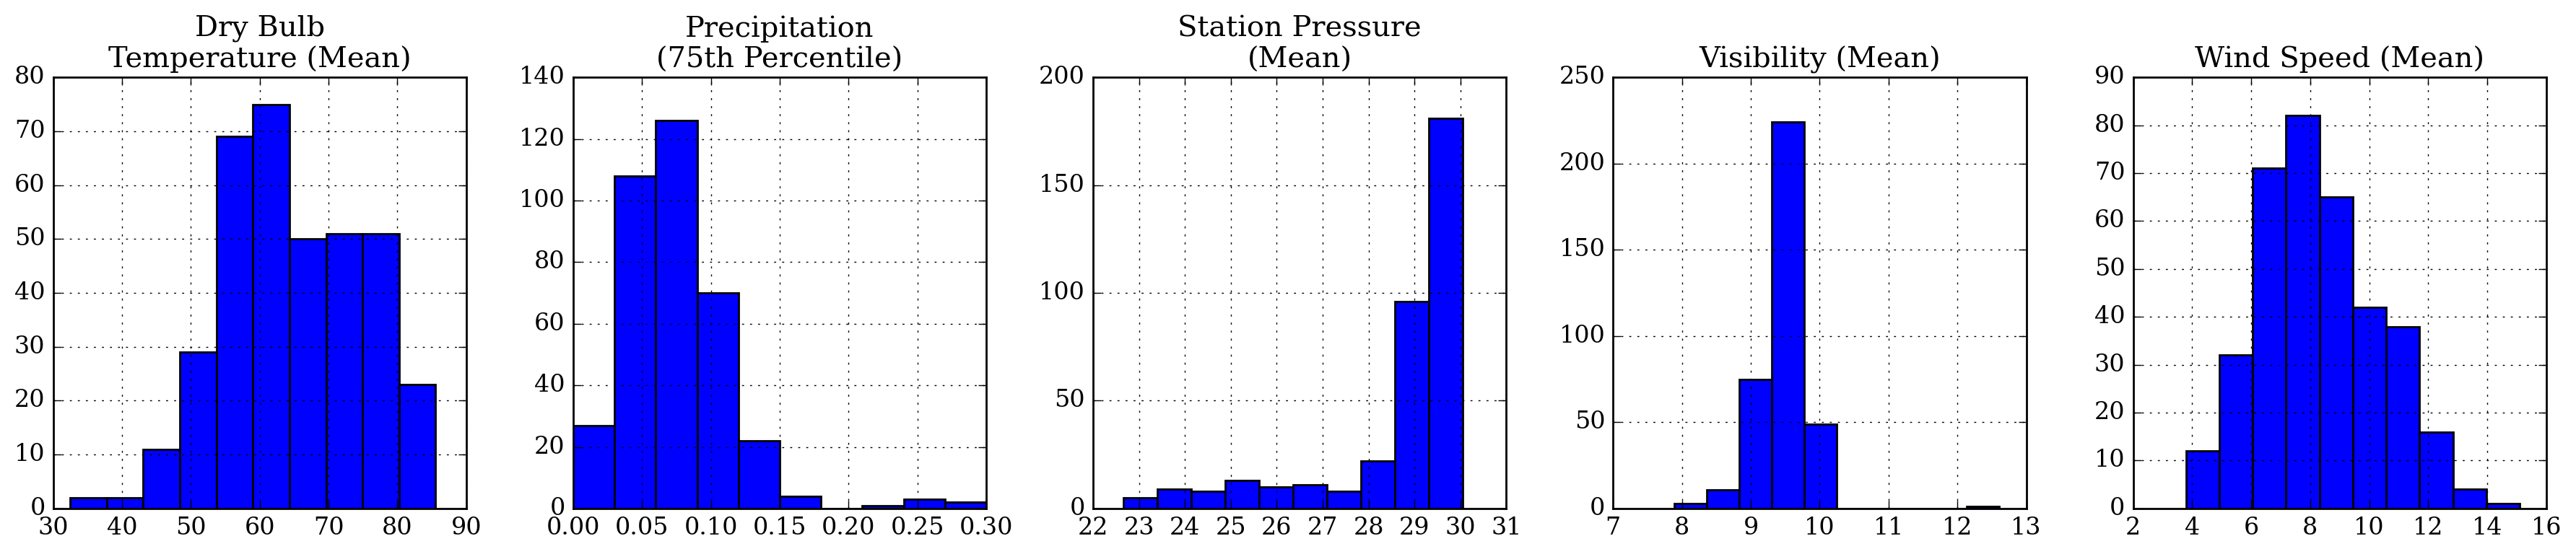

In [14]:
# Create and set up a Matplotlib figure
fig, axes = plt.subplots(1, 5, figsize=(18, 4), dpi=200)

# Add a histogram of some of the weather statistics to the plot
df_stations_stats[('HourlyDryBulbTemperature', 'mean')].hist(ax=axes[0])
df_stations_stats[('HourlyPrecipitation', 'percentile_75')].hist(ax=axes[1])
df_stations_stats[('HourlyStationPressure', 'mean')].hist(ax=axes[2])
df_stations_stats[('HourlyVisibility', 'mean')].hist(ax=axes[3])
df_stations_stats[('HourlyWindSpeed', 'mean')].hist(ax=axes[4])

axes[0].set_title('Dry Bulb\nTemperature (Mean)')
axes[1].set_title('Precipitation\n(75th Percentile)')
axes[2].set_title('Station Pressure\n(Mean)')
axes[3].set_title('Visibility (Mean)')
axes[4].set_title('Wind Speed (Mean)')

# Display the resulting plot
plt.tight_layout()
plt.show()

A note to the professors: the below function can take upwards of two hours to process. To test the code, I suggest passing a sample of the DataFrame instead. Thank you for your understanding.

In [15]:
# Define a function to categorise weather conditions into categories
def categorise_conditions(row, feature, df_stations_stats, suffix):
    station_id = row['STATION' + suffix]

    if feature == 'HourlyPrecipitation':
        station_stats = df_stations_stats.loc[station_id, feature]
        percentile_75 = station_stats['percentile_75']
        percentile_99 = station_stats['percentile_99']

        value = row[feature + suffix]

        if value < percentile_75:
            return 0  # None to minor rain
        elif value < percentile_99:
            return 1  # Moderate rain
        elif value >= percentile_99:
            return 2  # Heavy rain
        else:
            return 0
    
    elif feature == 'HourlyVisibility':
        station_stats = df_stations_stats.loc[station_id, feature]
        mean = station_stats['mean']
        std = station_stats['std']

        value = row[feature + suffix]

        if value < 2:
            return 2  # Poor visibility
        elif value < 5:
            return 1  # Moderate visibility
        else:
            return 0  # Good visibility
    
    else:
        station_stats = df_stations_stats.loc[station_id, feature]
        mean = station_stats['mean']
        std = station_stats['std']

        value = row[feature + suffix]

        if value < mean - 2 * std or value > mean + 2 * std:
            return 2  # Significantly above or below average
        elif value < mean - std or value > mean + std:
            return 1  # Above or below average
        else:
            return 0  # Average
        
# Apply the 'categorise_conditions' function to create new columns for categorised weather conditions
for suffix in ['_x', '_y']:
    for feature in ['HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWindSpeed']:
        print(f'Processing: {feature + suffix}...')
        df[feature + suffix + '_categorised'] = df.apply(categorise_conditions, axis=1, args=(feature, df_stations_stats, suffix))
        print('    Complete')

# Rearrange the columns by grouping categorical columns together with their continuous counterparts
categorised_columns = [col for col in df.columns if col.endswith('_categorised')]
remaining_columns = [col for col in df.columns if not col.endswith('_categorised')]

new_column_order = []

for col in remaining_columns:
    new_column_order.append(col)
    if col + '_categorised' in categorised_columns:
        new_column_order.append(col + '_categorised')

df = df[new_column_order]

# Display the resulting DataFrame
df

Processing: HourlyDryBulbTemperature_x...
    Complete
Processing: HourlyPrecipitation_x...
    Complete
Processing: HourlyStationPressure_x...
    Complete
Processing: HourlyVisibility_x...
    Complete
Processing: HourlyWindSpeed_x...
    Complete
Processing: HourlyDryBulbTemperature_y...
    Complete
Processing: HourlyPrecipitation_y...
    Complete
Processing: HourlyStationPressure_y...
    Complete
Processing: HourlyVisibility_y...
    Complete
Processing: HourlyWindSpeed_y...
    Complete


,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,departure_delay_categorised,arrival_delay,arrival_delay_categorised,...,HourlyDryBulbTemperature_y,HourlyDryBulbTemperature_y_categorised,HourlyPrecipitation_y,HourlyPrecipitation_y_categorised,HourlyStationPressure_y,HourlyStationPressure_y_categorised,HourlyVisibility_y,HourlyVisibility_y_categorised,HourlyWindSpeed_y,HourlyWindSpeed_y_categorised
0,AS,121,SEA,ANC,2019-07-01,215,0,0,-16,0,...,57.0,0,0.0,0,30.04,1,10.0,0,3.0,0
3,F9,402,LAX,DEN,2019-07-01,143,-1,0,-7,0,...,62.0,0,0.0,0,24.69,0,10.0,0,8.0,0
4,F9,790,PDX,DEN,2019-07-01,156,21,1,10,0,...,62.0,0,0.0,0,24.70,0,8.0,0,10.0,0
5,F9,662,SFO,DEN,2019-07-01,158,106,2,84,2,...,62.0,0,0.0,0,24.70,0,8.0,0,10.0,0
6,AS,135,ORD,ANC,2019-07-01,400,-9,0,-4,0,...,57.0,0,0.0,0,30.06,1,10.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512898,DL,3526,ATL,MGM,2019-05-31,59,-1,0,-18,0,...,74.0,0,0.0,0,29.67,1,10.0,0,6.0,0
5512899,DL,508,ATL,BHM,2019-05-31,55,-3,0,-6,0,...,74.0,0,0.0,0,29.26,0,10.0,0,0.0,1
5512900,DL,1075,ATL,HSV,2019-05-31,57,31,1,18,1,...,71.0,0,0.0,0,29.20,1,10.0,0,3.0,0
5512901,DL,2436,ATL,BHM,2019-05-31,56,28,1,13,0,...,67.0,0,0.0,0,29.24,1,10.0,0,0.0,1


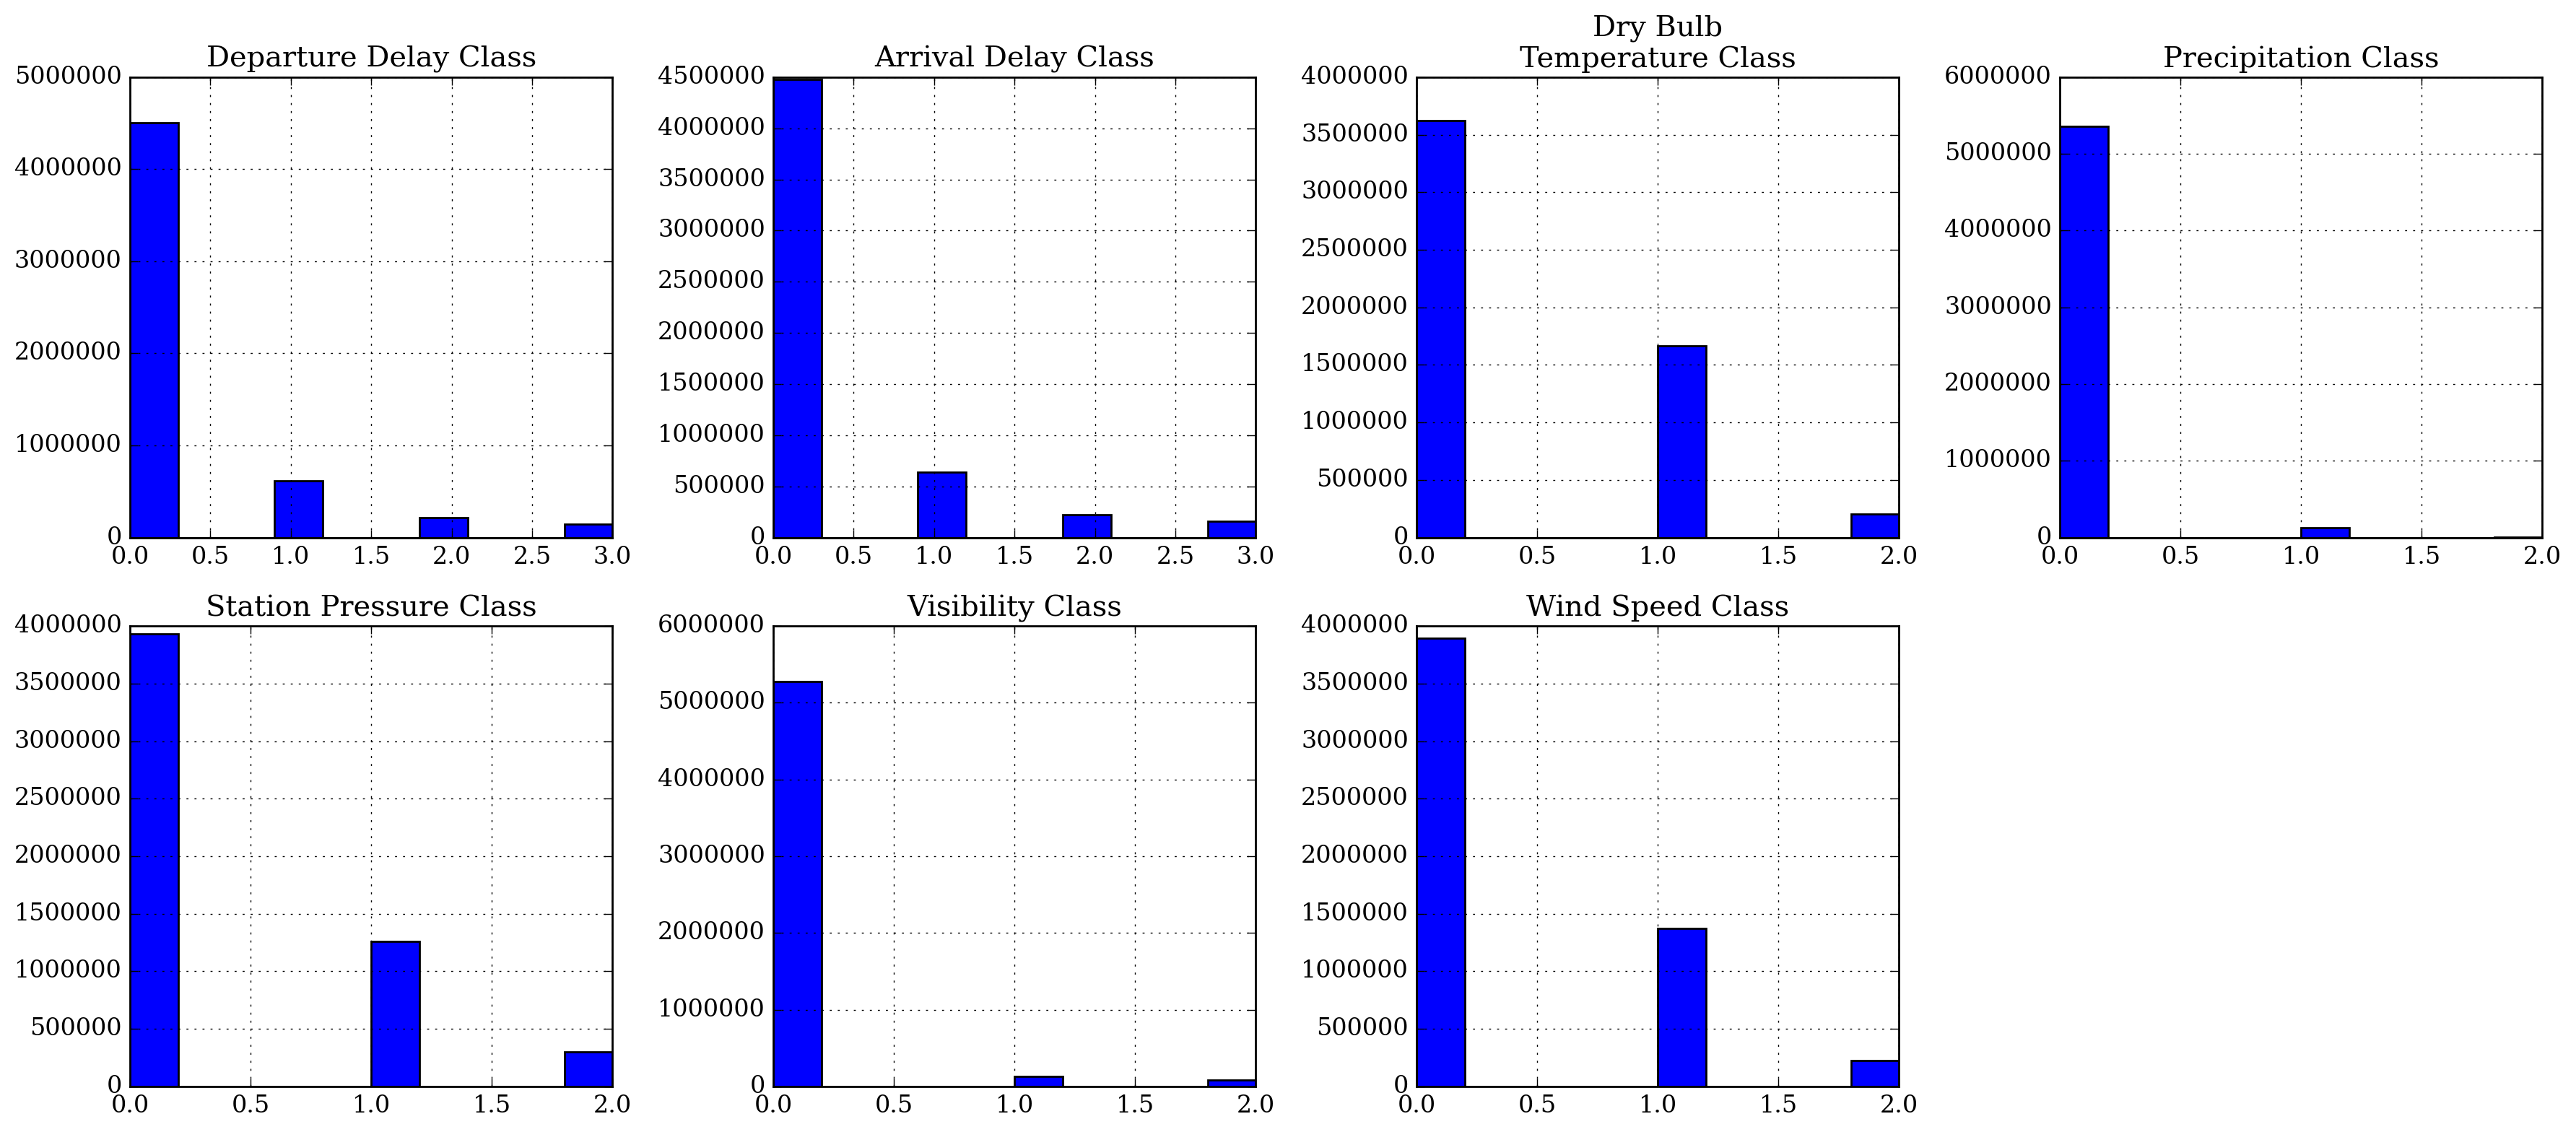

In [16]:
# Create and set up a Matplotlib figure
fig, axes = plt.subplots(2, 4, figsize=(18, 8), dpi=200)

# Add a histogram of each of the categorised delay and weather columns to the plot
df['departure_delay_categorised'].hist(ax=axes[0, 0])
df['arrival_delay_categorised'].hist(ax=axes[0, 1])
df['HourlyDryBulbTemperature_x_categorised'].hist(ax=axes[0, 2])
df['HourlyPrecipitation_x_categorised'].hist(ax=axes[0, 3])
df['HourlyStationPressure_x_categorised'].hist(ax=axes[1, 0])
df['HourlyVisibility_x_categorised'].hist(ax=axes[1, 1])
df['HourlyWindSpeed_x_categorised'].hist(ax=axes[1, 2])

axes[0, 0].set_title('Departure Delay Class')
axes[0, 1].set_title('Arrival Delay Class')
axes[0, 2].set_title('Dry Bulb\nTemperature Class')
axes[0, 3].set_title('Precipitation Class')
axes[1, 0].set_title('Station Pressure Class')
axes[1, 1].set_title('Visibility Class')
axes[1, 2].set_title('Wind Speed Class')
axes[1, 3].remove()

# Display the resulting plot
plt.tight_layout()
plt.show()

In [17]:
# Save the final DataFrame to a CSV file
df.to_csv('flights_weather_df.csv')